In [94]:
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf

In [95]:
def displayData(X, example_width=None):
    m,n = X.shape
    plt.figure()
    if X.ndim == 1:
        X = np.reshape(X, (-1,m))
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))
    plt.set_cmap("gray")
    example_height = n / example_width
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))
    pad = 1
    display_array = -np.ones((pad + display_rows * int(example_height + pad),  pad + display_cols * int(example_width + pad)))
    curr_ex = 1
    for j in range(1,display_rows+1):
        for i in range (1,display_cols+1):
            if curr_ex > m:
                break
            max_val = max(abs(X[curr_ex-1, :]))
            rows = pad + (j - 1) * (int(example_height) + pad) + np.array(range(int(example_height)))
            cols = pad + (i - 1) * (int(example_width)  + pad) + np.array(range(int(example_width)))
            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (int(example_height), int(example_width)), order="F") / max_val
            curr_ex += 1
            if curr_ex > m:
                break
    h = plt.imshow(display_array, vmin=-1, vmax=1)
    plt.axis('off')
    plt.show(block=False)
    return h, display_array

In [96]:
def dense_to_one_hot(labels_dense, num_classes=10):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

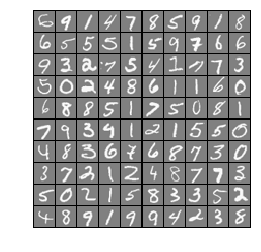

In [97]:
input_layer_size = 400
num_classes = 10
data = scipy.io.loadmat('hand_written_numbers.mat')
X=data["X"]
y=data["y"]
labels = dense_to_one_hot(y,num_classes)
m,n=X.shape
rand_indices = np.random.permutation(m)
random_images = X[rand_indices[:100],:]
displayData(random_images);

In [100]:
learning_rate = 0.01
training_epochs = 200
batch_size = 100
display_step = 100

x_data = tf.placeholder(tf.float32,[None,n])
y_data = tf.placeholder(tf.float32,[None,num_classes])

W = tf.Variable(tf.zeros([n,num_classes]))
b = tf.Variable(tf.zeros([num_classes]))

pred = tf.nn.softmax(tf.add(tf.matmul(x_data,W),b))
cost = tf.reduce_mean(-tf.reduce_sum(y_data*tf.log(pred), reduction_indices=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [106]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(m/batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = X[i*batch_size:(i+1)*batch_size],labels[i*batch_size:(i+1)*batch_size]
            _, c= sess.run([optimizer, cost], feed_dict={x_data: batch_xs,y_data: batch_ys})
            avg_cost += c/total_batch
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print("Optimization finished")
  
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy: ",sess.run(accuracy,feed_dict={x_data:X}))
    num_digit=2395#int(input("Input the index of the random image you want to predict "))
    pred2=tf.argmax(pred, 1)
    pred1=sess.run(pred2,feed_dict={x_data:X[num_digit,:].reshape(1,-1)})

Epoch: 0100 cost= 0.435341784
Epoch: 0200 cost= 0.358519373
Optimization finished
Accuracy:  0.9096


Predicted digit  [4]
Actual digit  [4]


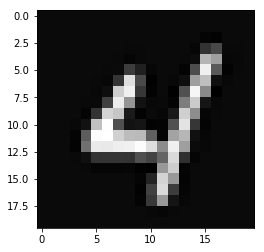

In [107]:
print("Predicted digit ", pred1)
print("Actual digit ",y[num_digit])
plt.imshow((X[num_digit,:].reshape(20,20)).T)
plt.show()